In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# reading data from device directory
df=pd.read_excel('E:/csv_files/Superstore_USA.xlsx')
# all colums in data 
df.columns


Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

In [44]:
# checking and filling null values 
df.isnull().any()
df.fillna({'Product Base Margin':'mean'},inplace=True)

Text(0.5, 1.0, 'Order Priority')

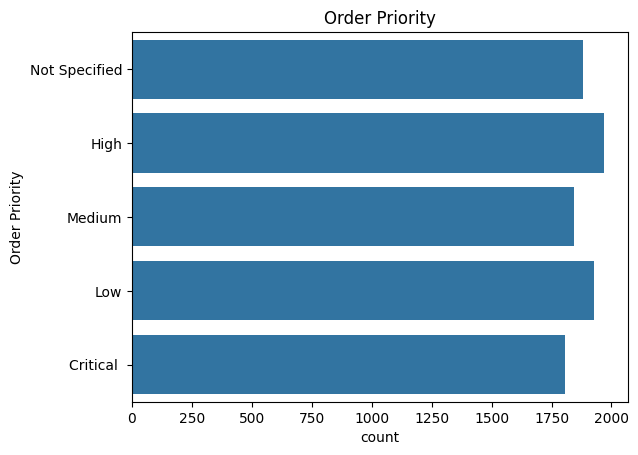

In [54]:
# removing ambiguity in order priority by using {df['order Priority'].unique()}
df['Order Priority'].unique()
df.replace('Critical','Critical ',inplace=True)

df['Order Priority'].value_counts()
sns.countplot(df['Order Priority'])
plt.title('Order Priority')

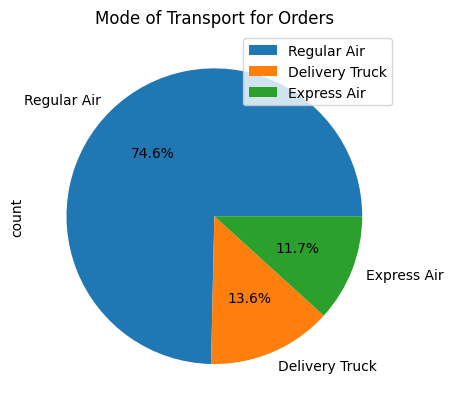

In [56]:
d=df['Ship Mode'].value_counts()
d.plot.pie(autopct='%0.1f%%')
plt.title('Mode of Transport for Orders')
plt.legend(loc='upper right')


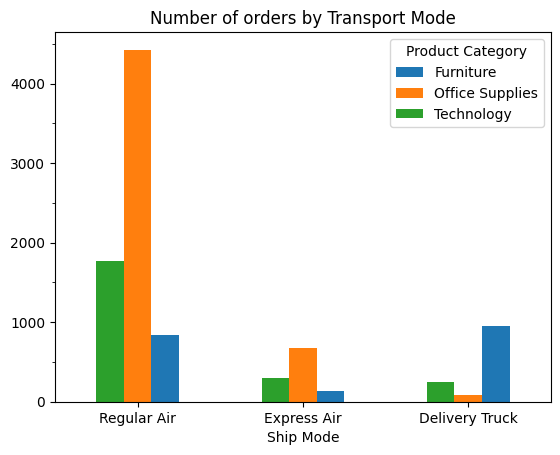

In [58]:
d=pd.crosstab(df['Ship Mode'],df['Product Category'])
fg,ax1=plt.subplots()
d.plot.bar(rot=0,ax=ax1)
plt.gca().invert_xaxis()
ax1.set_yticks(np.arange(0,5000,500),minor=True)
plt.title("Number of orders by Transport Mode")
plt.show()

Text(0.5, 1.0, 'Customer Base order')

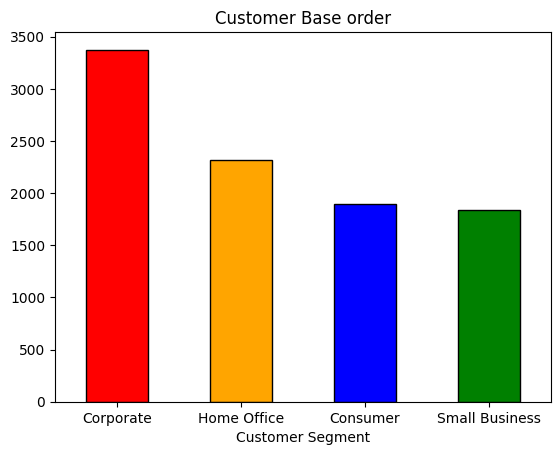

In [59]:
d=df['Customer Segment'].value_counts()
d.plot.bar(rot=0,color=['red','orange','blue','green'],edgecolor='black')
plt.title('Customer Base order')

Text(0.5, 1.0, 'Supply base order')

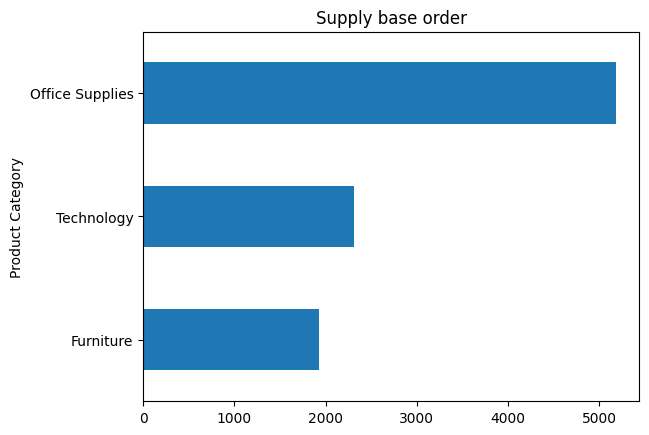

In [49]:
d=df['Product Category'].value_counts()
d.plot.barh()
plt.gca().invert_yaxis()
plt.title('Supply base order')


<Figure size 1000x600 with 0 Axes>

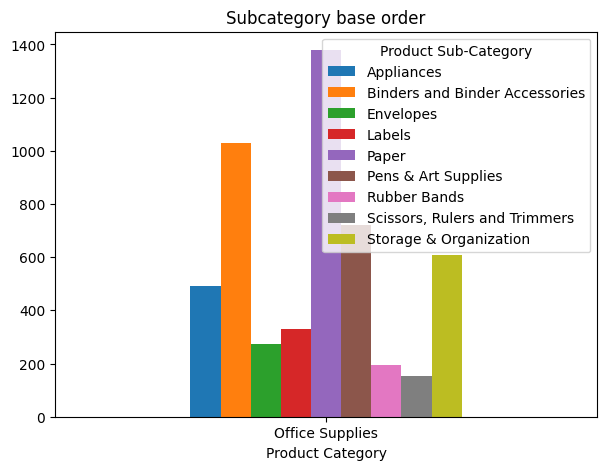

In [50]:
plt.figure(figsize=(10,6))
d=pd.crosstab([df[df['Product Category']=='Office Supplies']['Product Category']],df['Product Sub-Category'])
d.plot.bar(rot=0,figsize=((7,5)))
plt.title('Subcategory base order')
plt.show()
# d=df[df['Product Category']=='Furniture']['Product Category']


<Axes: title={'center': 'Yearly Base orders'}, ylabel='Order Date'>

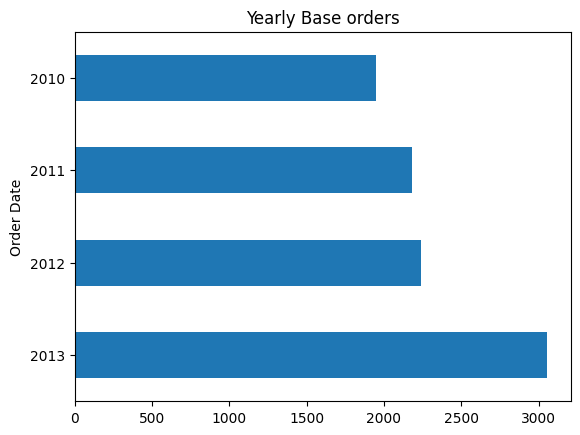

In [51]:
d=df['Order Date'].dt.year.value_counts()
plt.title('Yearly Base orders')

d.plot.barh()

Text(0.5, 1.0, 'Categorical profit')

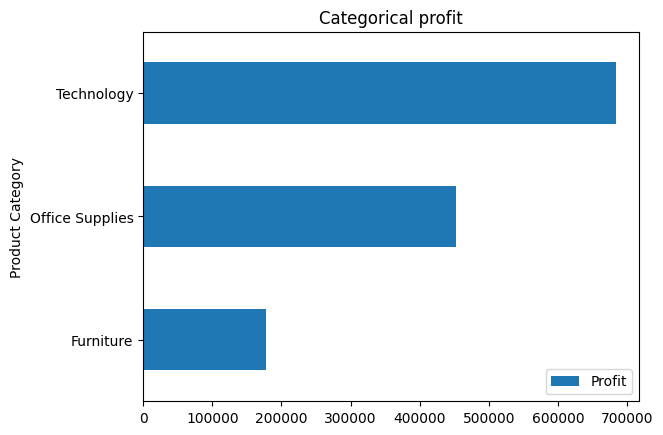

In [52]:
# d=df.groupby('Product Category')['Profit'].sum()
d=df.groupby('Product Category').agg({'Profit':'sum'})
d.plot.barh()
plt.title('Categorical profit')

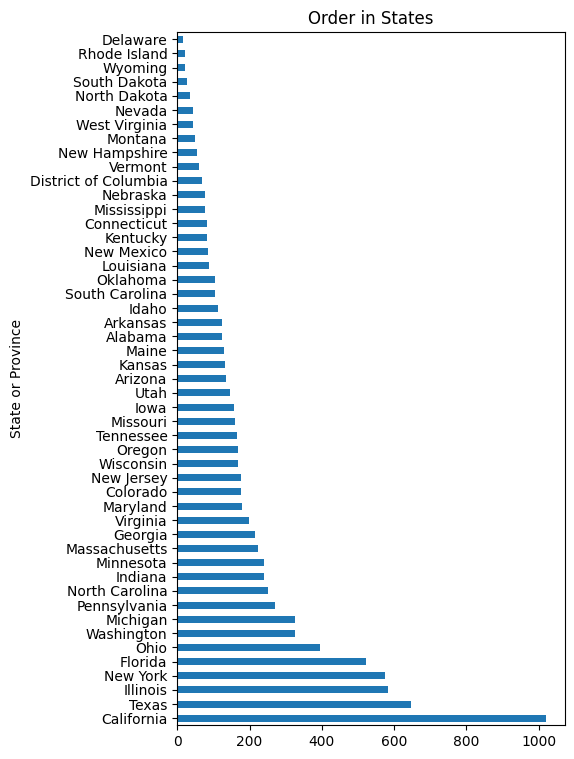

In [61]:
d=df['State or Province'].value_counts()
plt.gca().invert_yaxis()
d.plot.barh(figsize=((5,9)))
plt.title('Order in States')
plt.show()